# Importing Python libraries

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import yfinance as yf
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from prettytable import PrettyTable
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Conv1D, Dense, Flatten, Reshape
import tensorflow as tf
from tensorflow.keras.layers import GRU
from math import sqrt

tf.get_logger().setLevel('ERROR')

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">  
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
<h1><center><strong>Stock Data</strong></center></h1>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
        
</div>

# ------------------------------------------------------------------------------------------------------

# Calling the data from api

In [38]:
# Get the data for the specific ticker
data = yf.Ticker("600719.SS")

# Fetch data for the specific date range
data = data.history(start="2014-12-08", end="2024-12-06")

# ------------------------------------------------------------------------------------------------------

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [39]:
data.head() # showing the first 5 rows of data

Open      High       Low     Close    Volume  \
Date                                                                          
2014-12-08 00:00:00+08:00  4.323799  4.412745  4.239793  4.328740   9071924   
2014-12-09 00:00:00+08:00  4.304033  4.719118  4.126140  4.565932  28199622   
2014-12-10 00:00:00+08:00  4.472043  4.872303  4.457218  4.867362  33190136   
2014-12-11 00:00:00+08:00  5.074904  5.287388  4.897011  4.985958  41764806   
2014-12-12 00:00:00+08:00  4.916778  4.921719  4.768533  4.847597  20167496   

                           Dividends  Stock Splits  
Date                                                
2014-12-08 00:00:00+08:00        0.0           0.0  
2014-12-09 00:00:00+08:00        0.0           0.0  
2014-12-10 00:00:00+08:00        0.0           0.0  
2014-12-11 00:00:00+08:00        0.0           0.0  
2014-12-12 00:00:00+08:00        0.0           0.0

### Five last records of data

In [40]:
data.tail() # showing the last 5 rows of data

Open  High   Low  Close    Volume  Dividends  \
Date                                                                      
2024-11-29 00:00:00+08:00  7.97  8.05  7.75   7.90  35945000        0.0   
2024-12-02 00:00:00+08:00  7.97  8.08  7.91   8.06  28547493        0.0   
2024-12-03 00:00:00+08:00  8.05  8.23  7.87   8.19  41635356        0.0   
2024-12-04 00:00:00+08:00  8.14  8.14  7.84   7.90  29012454        0.0   
2024-12-05 00:00:00+08:00  7.88  8.18  7.83   8.08  29140540        0.0   

                           Stock Splits  
Date                                     
2024-11-29 00:00:00+08:00           0.0  
2024-12-02 00:00:00+08:00           0.0  
2024-12-03 00:00:00+08:00           0.0  
2024-12-04 00:00:00+08:00           0.0  
2024-12-05 00:00:00+08:00           0.0

### Coloumns/features in data

In [41]:
data.columns #columns in data

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

### Length of data

In [42]:
print('lenght of data is', len(data)) #lenght of data

lenght of data is 2429


### Shape of data

In [43]:
data.shape #shape of data

(2429, 7)

### Data information

In [44]:
data.info() #information of data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2429 entries, 2014-12-08 00:00:00+08:00 to 2024-12-05 00:00:00+08:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2429 non-null   float64
 1   High          2429 non-null   float64
 2   Low           2429 non-null   float64
 3   Close         2429 non-null   float64
 4   Volume        2429 non-null   int64  
 5   Dividends     2429 non-null   float64
 6   Stock Splits  2429 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 151.8 KB


### Data types of all coloumns

In [45]:
data.dtypes #data types of data

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

### Checking missing Values

In [46]:
data[data.isnull().any(axis=1)].head() #checking the null values

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []

### Count of missing values

In [47]:
np.sum(data.isnull().any(axis=1)) #checking the null values

0

### Is there any missing values?

In [48]:
data.isnull().values.any() #checking the null values

False

### Counts of missing values in each column

In [49]:
data.isnull().sum() #checking the null values columns wise

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Data Description

In [50]:
data.describe() # statics of data

Open         High          Low        Close        Volume  \
count  2429.000000  2429.000000  2429.000000  2429.000000  2.429000e+03   
mean      5.648006     5.757031     5.553495     5.658137  9.250074e+06   
std       1.633744     1.684812     1.593406     1.639392  1.399934e+07   
min       2.783416     2.843274     2.773440     2.783416  0.000000e+00   
25%       4.256814     4.330000     4.191254     4.256813  2.044544e+06   
50%       5.297994     5.331861     5.206711     5.306266  4.338550e+06   
75%       7.226345     7.350000     7.117267     7.221830  9.641226e+06   
max      11.780000    12.300000    11.030000    11.780000  1.273749e+08   

         Dividends  Stock Splits  
count  2429.000000   2429.000000  
mean      0.000026      0.000823  
std       0.000526      0.040580  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       0.016500      2.000000

### Spliting date into day, month and year

In [51]:
data['date'] = data.index # taking dates in date column
data['Month'] = data['date'].dt.month # extracting months from data
data['Day'] = data['date'].dt.day # extracting day from data
data['Year'] = data['date'].dt.year # extracting year from data

### Close price with respect to year

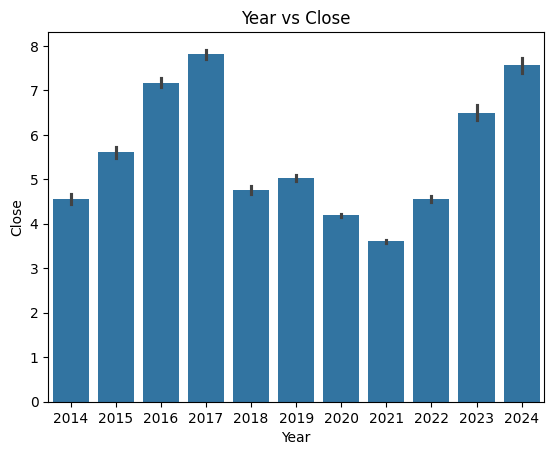

In [52]:
sns.barplot(x='Year', y='Close', data=data).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot

### Close price with respect to Month

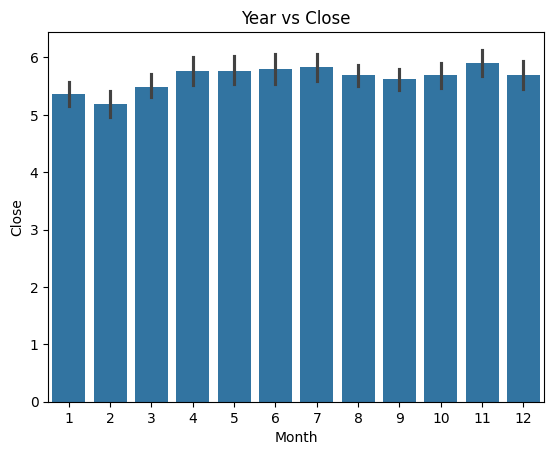

In [53]:
sns.barplot(x='Month', y='Close', data=data).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

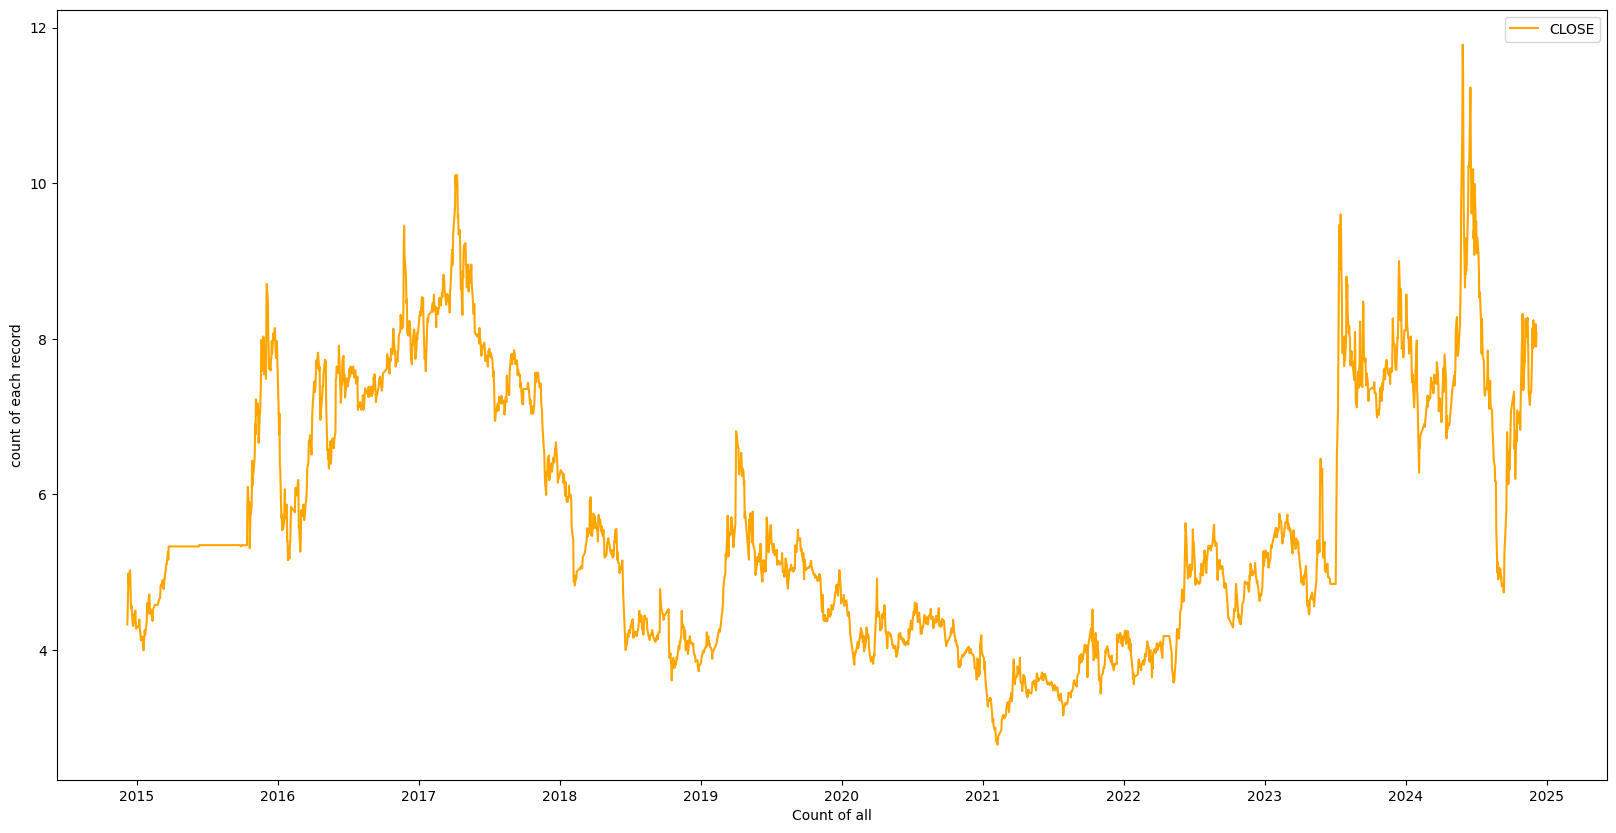

In [54]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot
plt.subplot(1,1,1) #plot setting
plt.plot(data.index, data['Close'].values,color='orange',label='CLOSE') # plotting Close price
plt.xlabel('Count of all') # x axis
plt.ylabel('count of each record') # y axis
plt.legend(loc='best') #legend name as Close
plt.show() # showing the plot

# ------------------------------------------------------------------------------------------------------

# Data Preparation and Feature Extraction

# ------------------------------------------------------------------------------------------------------

### stochastic features

In [55]:
def stochastic(df, k, d): #start building stochastic function
    low_min  = df['Low'].rolling(window=k).min() #calculating the rolling window  with minimum numbers
    high_max = df['High'].rolling( window=k).max() #calculating the rolling window  with maximum numbers
    df['stochastic_k'] = 100 * (df['Close'] - low_min)/(high_max - low_min) # calculating stochastic_k
    df['stochastic_d'] = df['stochastic_k'].rolling(window=d).mean() # calculating stochastic_d
    return df #retrun the results

stochs = stochastic(data, k=14, d=3) #calling stochastic function above
fig = go.Figure() #setting the plot
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_k.tail(365), name='K stochastic')) #plotting stochastic_k
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_d.tail(365), name='D stochastic')) # plotting stochastic_d
fig.show() # showing the plot

### EMA, MACD, MACD signal line features
- The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA. The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line

In [56]:
EMA_12 = pd.Series(data['Close'].ewm(span=12, min_periods=12).mean())  #calculating the mean span 12 of close
EMA_26 = pd.Series(data['Close'].ewm(span=26, min_periods=26).mean()) #calculating the mean span 26 of close
MACD = pd.Series(EMA_12 - EMA_26) #calculating the MACD
data['MACD']=pd.Series(EMA_12 - EMA_26) # taking MACD in data
MACD_signal = pd.Series(MACD.ewm(span=9, min_periods=9).mean()) # macd signal
fig = make_subplots(rows=2, cols=1) #setting plot
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close'), row=1, col=1) # plotting Close
fig.add_trace(go.Scatter(x=data.index, y=EMA_12, name='EMA 12'), row=1, col=1)  #plotting ema12
fig.add_trace(go.Scatter(x=data.index, y=EMA_26, name='EMA 26'), row=1, col=1)  #plotting ema 26
fig.add_trace(go.Scatter(x=data.index, y=MACD, name='MACD'), row=2, col=1)  #plotting macd
fig.add_trace(go.Scatter(x=data.index, y=MACD_signal, name='Signal line'), row=2, col=1)  #plotting signal line
fig.show() #showing the plot

### Moving average features

In [57]:
data['EMA_50'] = data['Close'].ewm(50).mean().shift() # calculting the ema 50
data['EMA_200'] =data['Close'].ewm(200).mean().shift() # calculting the ema 200
data['MA_50'] = data['Close'].rolling(50).mean() # calculting the ma 50
data['MA_200'] = data['Close'].rolling(200).mean() # calculting the ma 200
fig = go.Figure() #plot setting
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_50, name='EMA 50')) # plotting the ema 50
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_200, name='EMA 200')) # plotting the ema 200
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3)) # plotting the close
fig.show() #showing the plot

In [58]:
fig = go.Figure() #plot setting
fig.add_trace(go.Scatter(x=data.index, y=data.MA_50, name='MA 50')) # plotting the ma 50
fig.add_trace(go.Scatter(x=data.index, y=data.MA_200, name='MA 200')) # plotting the ma 200
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3)) # plotting the close
fig.show() # showing plot

### Relative Strength Index RSI 7

In [59]:
def RSI(data, n=7): #built RSI function
    close = data['Close'] #calling the close price
    delta = close.diff() #tak9ing the difference of daily prices
    delta = delta[1:] # taking all the difrrence values in the close
    pricesUp = delta.copy() #taking copy as up prices
    pricesDown = delta.copy() #taking copy as down prices
    pricesUp[pricesUp < 0] = 0 # making less than 0 value as 0
    pricesDown[pricesDown > 0] = 0 # making greater than 0 value as 0
    rollUp = pricesUp.rolling(n).mean() #taking rolling mean over 7 days of up
    rollDown = pricesDown.abs().rolling(n).mean() #taking rolling mean over 7 days of down
    rs = rollUp / rollDown #calculating RS
    rsi = 100.0 - (100.0 / (1.0 + rs)) #calculating RSI
    return rsi #return the results

data['RSI 7'] = RSI(data).fillna(0) # calling the above function and taking RSI 7
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 7'])) #plotting the RSI 7
fig.show() #howing the plot

# Calculating P/E Ratio

In [60]:
#Since we dont have EPS data from the stock so we are using Volume inplace of EPS
#We would be using this formula if we had EPS data
#data['P/E Ratio'] = data['Close'] / data['EPS']
data['P/E Ratio'] = data['Close'] / (data['Volume'] / 1e6 + 1)

In [61]:
data['P/E Ratio']

Date
2014-12-08 00:00:00+08:00    0.429783
2014-12-09 00:00:00+08:00    0.156370
2014-12-10 00:00:00+08:00    0.142362
2014-12-11 00:00:00+08:00    0.116590
2014-12-12 00:00:00+08:00    0.229011
                               ...   
2024-11-29 00:00:00+08:00    0.213831
2024-12-02 00:00:00+08:00    0.272781
2024-12-03 00:00:00+08:00    0.192094
2024-12-04 00:00:00+08:00    0.263224
2024-12-05 00:00:00+08:00    0.268077
Name: P/E Ratio, Length: 2429, dtype: float64

# Number of transactions

In [62]:
data['Num_Transactions'] = data['Volume'] / 100
data['Num_Transactions']

Date
2014-12-08 00:00:00+08:00     90719.24
2014-12-09 00:00:00+08:00    281996.22
2014-12-10 00:00:00+08:00    331901.36
2014-12-11 00:00:00+08:00    417648.06
2014-12-12 00:00:00+08:00    201674.96
                               ...    
2024-11-29 00:00:00+08:00    359450.00
2024-12-02 00:00:00+08:00    285474.93
2024-12-03 00:00:00+08:00    416353.56
2024-12-04 00:00:00+08:00    290124.54
2024-12-05 00:00:00+08:00    291405.40
Name: Num_Transactions, Length: 2429, dtype: float64

# Profitability

In [63]:
data['Profitability'] = data['Close'].pct_change().fillna(0)
data['Profitability']

Date
2014-12-08 00:00:00+08:00    0.000000
2014-12-09 00:00:00+08:00    0.054795
2014-12-10 00:00:00+08:00    0.066017
2014-12-11 00:00:00+08:00    0.024366
2014-12-12 00:00:00+08:00   -0.027750
                               ...   
2024-11-29 00:00:00+08:00   -0.018634
2024-12-02 00:00:00+08:00    0.020253
2024-12-03 00:00:00+08:00    0.016129
2024-12-04 00:00:00+08:00   -0.035409
2024-12-05 00:00:00+08:00    0.022785
Name: Profitability, Length: 2429, dtype: float64

# Final Data after features extraction and preparation

In [64]:
data=data.tail(len(data)-200) # ignoring the first 200 rows as there are Nan/missing values
data #data

Open      High       Low     Close    Volume  \
Date                                                                          
2015-09-30 00:00:00+08:00  5.348218  5.348218  5.348218  5.348218         0   
2015-10-08 00:00:00+08:00  5.348218  5.348218  5.348218  5.348218         0   
2015-10-09 00:00:00+08:00  5.348218  5.348218  5.348218  5.348218         0   
2015-10-12 00:00:00+08:00  5.348218  5.348218  5.348218  5.348218         0   
2015-10-13 00:00:00+08:00  5.348218  5.348218  5.348218  5.348218         0   
...                             ...       ...       ...       ...       ...   
2024-11-29 00:00:00+08:00  7.970000  8.050000  7.750000  7.900000  35945000   
2024-12-02 00:00:00+08:00  7.970000  8.080000  7.910000  8.060000  28547493   
2024-12-03 00:00:00+08:00  8.050000  8.230000  7.870000  8.190000  41635356   
2024-12-04 00:00:00+08:00  8.140000  8.140000  7.840000  7.900000  29012454   
2024-12-05 00:00:00+08:00  7.880000  8.180000  7.830000  8.080000  29140540   

                           Dividends  Stock Splits                      date  \
Date                                                                           
2015-09-30 00:00:00+08:00        0.0           0.0 2015-09-30 00:00:00+08:00   
2015-10-08 00:00:00+08:00        0.0           0.0 2015-10-08 00:00:00+08:00   
2015-10-09 00:00:00+08:00        0.0           0.0 2015-10-09 00:00:00+08:00   
2015-10-12 00:00:00+08:00        0.0           0.0 2015-10-12 00:00:00+08:00   
2015-10-13 00:00:00+08:00        0.0           0.0 2015-10-13 00:00:00+08:00   
...                              ...           ...                       ...   
2024-11-29 00:00:00+08:00        0.0           0.0 2024-11-29 00:00:00+08:00   
2024-12-02 00:00:00+08:00        0.0           0.0 2024-12-02 00:00:00+08:00   
2024-12-03 00:00:00+08:00        0.0           0.0 2024-12-03 00:00:00+08:00   
2024-12-04 00:00:00+08:00        0.0           0.0 2024-12-04 00:00:00+08:00   
2024-12-05 00:00:00+08:00        0.0           0.0 2024-12-05 00:00:00+08:00   

                           Month  Day  ...  stochastic_d      MACD    EMA_50  \
Date                                   ...                                     
2015-09-30 00:00:00+08:00      9   30  ...     75.000035 -0.001542  5.303504   
2015-10-08 00:00:00+08:00     10    8  ...     77.083400 -0.001143  5.304397   
2015-10-09 00:00:00+08:00     10    9  ...     79.166764 -0.000817  5.305272   
2015-10-12 00:00:00+08:00     10   12  ...     79.166764 -0.000552  5.306130   
2015-10-13 00:00:00+08:00     10   13  ...     79.166764 -0.000339  5.306970   
...                          ...  ...  ...           ...       ...       ...   
2024-11-29 00:00:00+08:00     11   29  ...     66.666657  0.180858  7.291954   
2024-12-02 00:00:00+08:00     12    2  ...     62.939964  0.187363  7.303877   
2024-12-03 00:00:00+08:00     12    3  ...     65.838501  0.200695  7.318703   
2024-12-04 00:00:00+08:00     12    4  ...     65.838501  0.185719  7.335787   
2024-12-05 00:00:00+08:00     12    5  ...     66.252569  0.186229  7.346850   

                            EMA_200     MA_50    MA_200      RSI 7  P/E Ratio  \
Date                                                                            
2015-09-30 00:00:00+08:00  5.155839  5.347624  5.073831  50.000000   5.348218   
2015-10-08 00:00:00+08:00  5.157351  5.347624  5.077742  50.000000   5.348218   
2015-10-09 00:00:00+08:00  5.158847  5.347624  5.080146  50.000000   5.348218   
2015-10-12 00:00:00+08:00  5.160326  5.347624  5.081958  50.000000   5.348218   
2015-10-13 00:00:00+08:00  5.161791  5.347624  5.084461  50.000000   5.348218   
...                             ...       ...       ...        ...        ...   
2024-11-29 00:00:00+08:00  7.023480  7.192200  7.527500  66.111107   0.213831   
2024-12-02 00:00:00+08:00  7.027841  7.258000  7.527900  69.230779   0.272781   
2024-12-03 00:00:00+08:00  7.032976  7.316800  7.532200  69.849240   0.192094   
2024-12-04 00:00:00+08:00  7.0

# -----------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features

In [65]:
X=data.drop(columns=['Close','date','Volume', 'Dividends','Stock Splits']) #dropping the 'Close','date','Volume', 'Dividends','Stock Splits' features and others as input features
X[X< 0] = 0 #making all negative values as 0
X #input features

Open      High       Low  Month  Day  Year  \
Date                                                                        
2015-09-30 00:00:00+08:00  5.348218  5.348218  5.348218      9   30  2015   
2015-10-08 00:00:00+08:00  5.348218  5.348218  5.348218     10    8  2015   
2015-10-09 00:00:00+08:00  5.348218  5.348218  5.348218     10    9  2015   
2015-10-12 00:00:00+08:00  5.348218  5.348218  5.348218     10   12  2015   
2015-10-13 00:00:00+08:00  5.348218  5.348218  5.348218     10   13  2015   
...                             ...       ...       ...    ...  ...   ...   
2024-11-29 00:00:00+08:00  7.970000  8.050000  7.750000     11   29  2024   
2024-12-02 00:00:00+08:00  7.970000  8.080000  7.910000     12    2  2024   
2024-12-03 00:00:00+08:00  8.050000  8.230000  7.870000     12    3  2024   
2024-12-04 00:00:00+08:00  8.140000  8.140000  7.840000     12    4  2024   
2024-12-05 00:00:00+08:00  7.880000  8.180000  7.830000     12    5  2024   

                           stochastic_k  stochastic_d      MACD    EMA_50  \
Date                                                                        
2015-09-30 00:00:00+08:00     79.166764     75.000035  0.000000  5.303504   
2015-10-08 00:00:00+08:00     79.166764     77.083400  0.000000  5.304397   
2015-10-09 00:00:00+08:00     79.166764     79.166764  0.000000  5.305272   
2015-10-12 00:00:00+08:00     79.166764     79.166764  0.000000  5.306130   
2015-10-13 00:00:00+08:00     79.166764     79.166764  0.000000  5.306970   
...                                 ...           ...       ...       ...   
2024-11-29 00:00:00+08:00     56.521738     66.666657  0.180858  7.291954   
2024-12-02 00:00:00+08:00     66.459642     62.939964  0.187363  7.303877   
2024-12-03 00:00:00+08:00     74.534121     65.838501  0.200695  7.318703   
2024-12-04 00:00:00+08:00     56.521738     65.838501  0.185719  7.335787   
2024-12-05 00:00:00+08:00     67.701847     66.252569  0.186229  7.346850   

                            EMA_200     MA_50    MA_200      RSI 7  P/E Ratio  \
Date                                                                            
2015-09-30 00:00:00+08:00  5.155839  5.347624  5.073831  50.000000   5.348218   
2015-10-08 00:00:00+08:00  5.157351  5.347624  5.077742  50.000000   5.348218   
2015-10-09 00:00:00+08:00  5.158847  5.347624  5.080146  50.000000   5.348218   
2015-10-12 00:00:00+08:00  5.160326  5.347624  5.081958  50.000000   5.348218   
2015-10-13 00:00:00+08:00  5.161791  5.347624  5.084461  50.000000   5.348218   
...                             ...       ...       ...        ...        ...   
2024-11-29 00:00:00+08:00  7.023480  7.192200  7.527500  66.111107   0.213831   
2024-12-02 00:00:00+08:00  7.027841  7.258000  7.527900  69.230779   0.272781   
2024-12-03 00:00:00+08:00  7.032976  7.316800  7.532200  69.849240   0.192094   
2024-12-04 00:00:00+08:00  7.038733  7.359200  7.535400  42.207777   0.263224   
2024-12-05 00:00:00+08:00  7.043018  7.393600  7.540900  56.849317   0.268077   

                           Num_Transactions  Profitability  
Date                                                        
2015-09-30 00:00:00+08:00              0.00       0.002788  
2015-10-08 00:00:00+08:00              0.00       0.000000  
2015-10-09 00:00:00+08:00              0.00       0.000000  
2015-10-12 00:00:00+08:00              0.00       0.000000  
2015-10-13 00:00:00+08:00              0.00       0.000000  
...                                     ...            ...  
2024-11-29 00:00:00+08:00         359450.00       0.000000  
2024-12-02 00:00:00+08:00         285474.93       0.020253  
2024-12-03 00:00:00+08:00         416353.56       0.016129  
2024-12-04 00:00:00+08:00         290124.54       0.000000  
2024-12-05 00:00:00+08:00         291405.40       0.022785  

[2229 rows x 17 columns]

### Taking target as output

In [66]:
y=data['Close'] # output close
y #output

Date
2015-09-30 00:00:00+08:00    5.348218
2015-10-08 00:00:00+08:00    5.348218
2015-10-09 00:00:00+08:00    5.348218
2015-10-12 00:00:00+08:00    5.348218
2015-10-13 00:00:00+08:00    5.348218
                               ...   
2024-11-29 00:00:00+08:00    7.900000
2024-12-02 00:00:00+08:00    8.060000
2024-12-03 00:00:00+08:00    8.190000
2024-12-04 00:00:00+08:00    7.900000
2024-12-05 00:00:00+08:00    8.080000
Name: Close, Length: 2229, dtype: float64

# Normalize features with MinMaxScaler

In [67]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = np.array(y).reshape(-1, 1)
y = scaler_y.fit_transform(y).flatten()

# Model creation function with GRU and LSTM layers

In [68]:
def GRU_LSTM_Model(lstm_layers=1, gru_layers=1, input_shape=(None, 1)):
    model = Sequential()
    model.add(Input(shape=input_shape))

    # GRU Layers
    for _ in range(gru_layers):
        model.add(GRU(64, return_sequences=True, activation='relu'))

    # LSTM Layers
    for _ in range(lstm_layers - 1):
        model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))

    # Dense layer to output the final prediction
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# TimeSeriesSplit

In [69]:
tscv = TimeSeriesSplit(n_splits=5)
results = []

## Training and evaluating the model with TimeSeriesSplit

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step


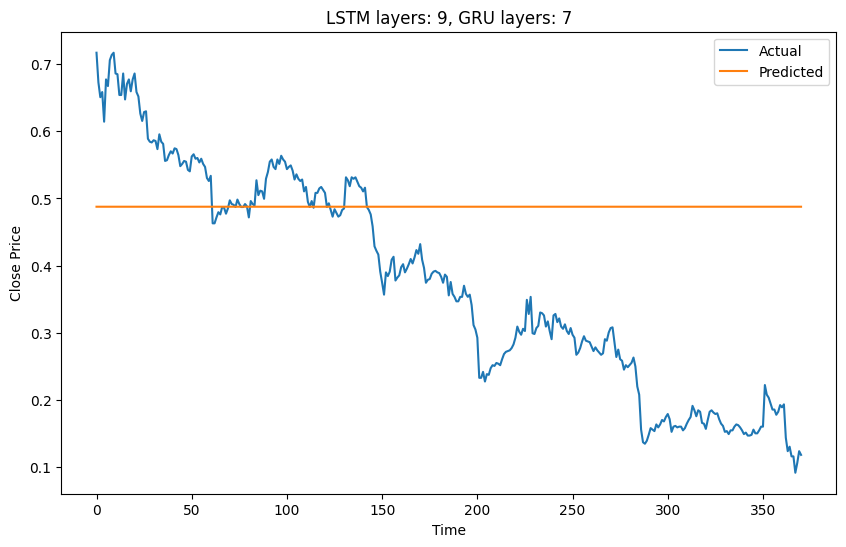

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step


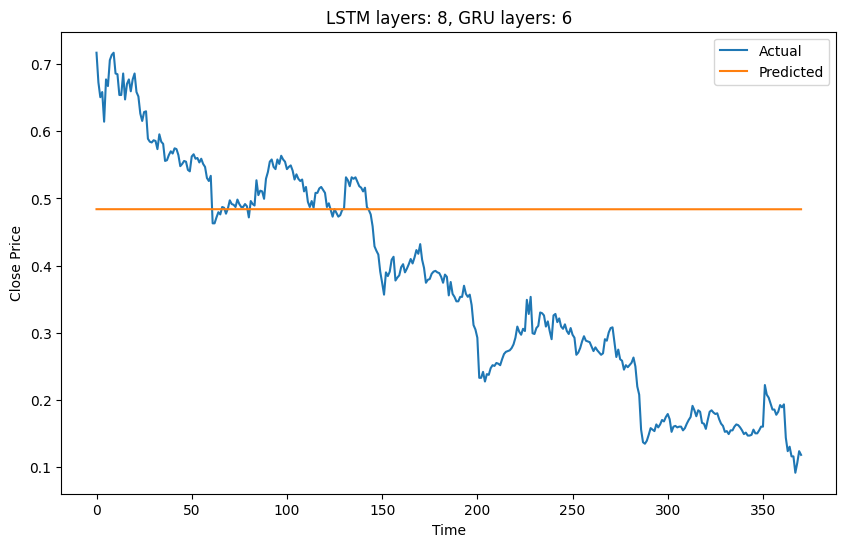

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step


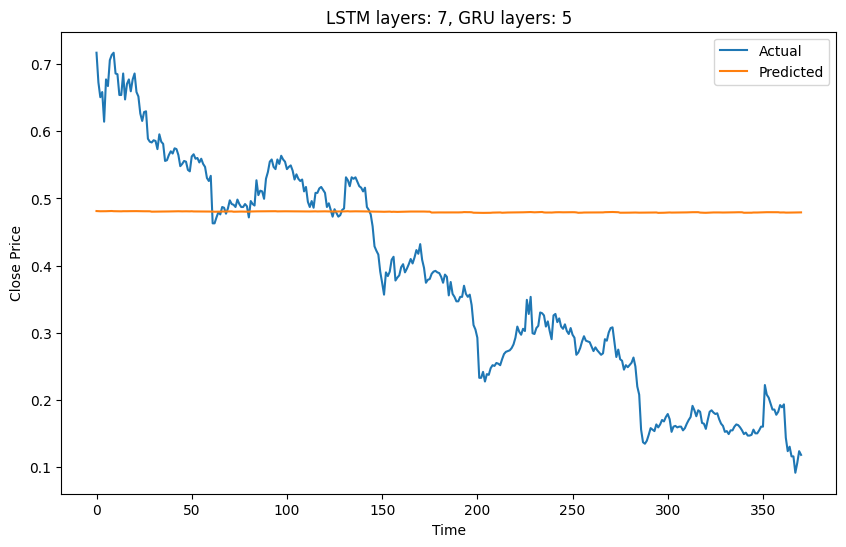

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step


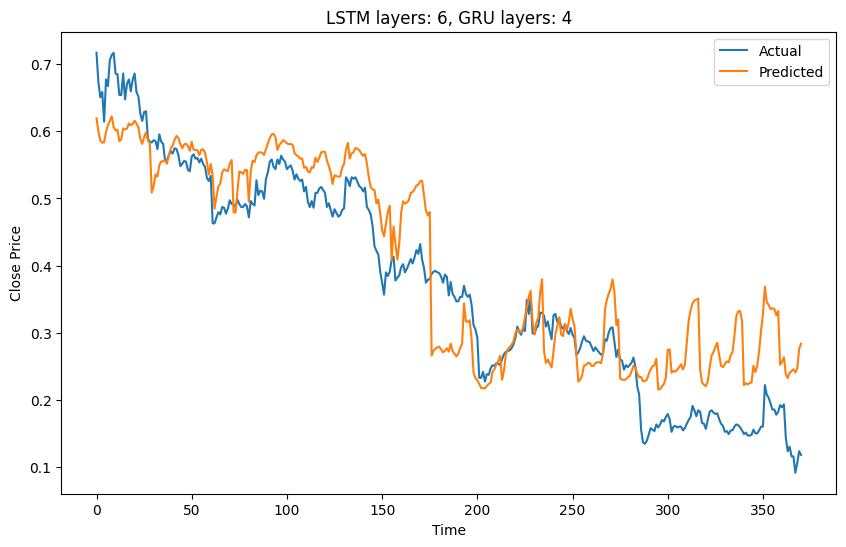

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step


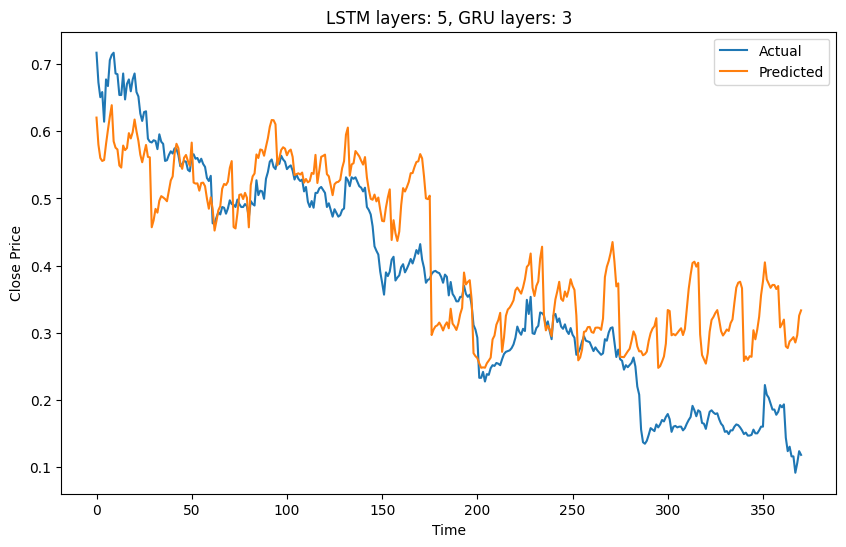

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step


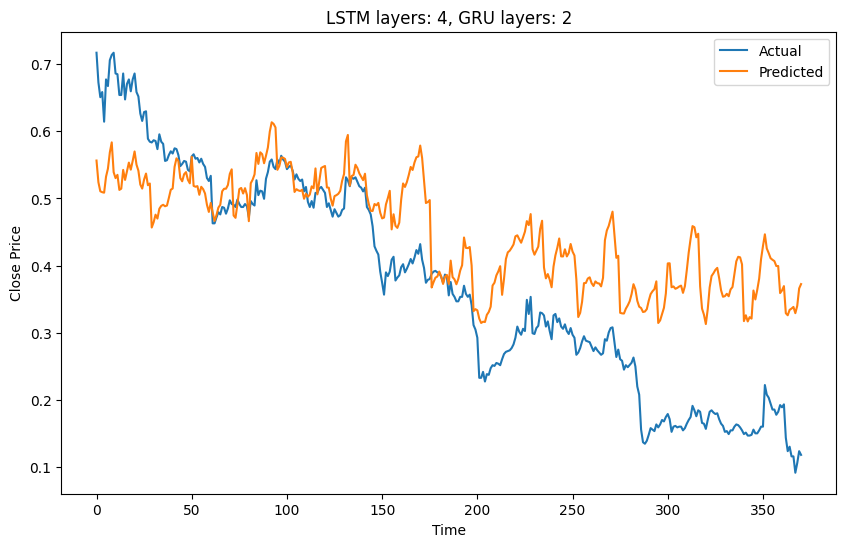

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


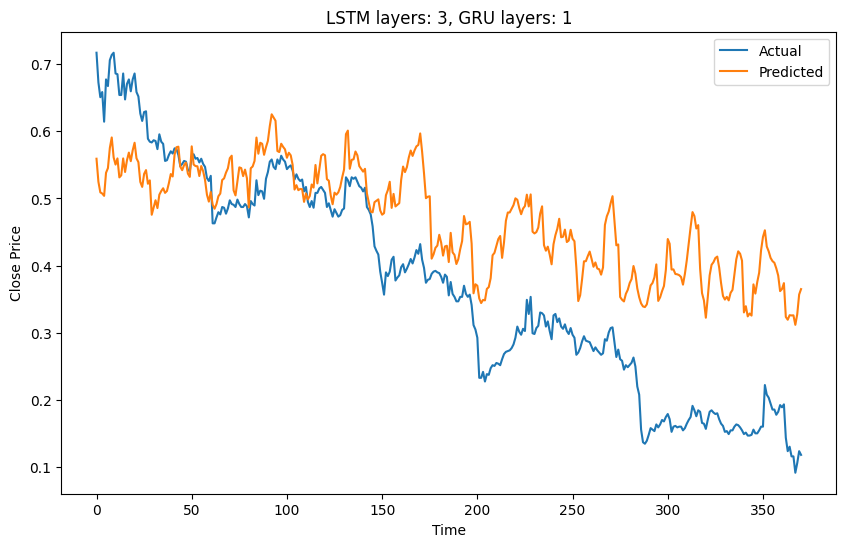

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step


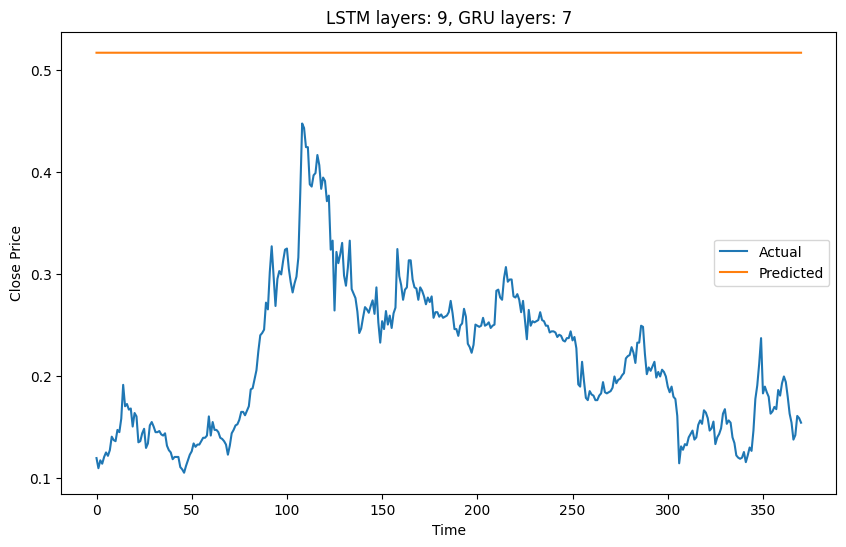

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step


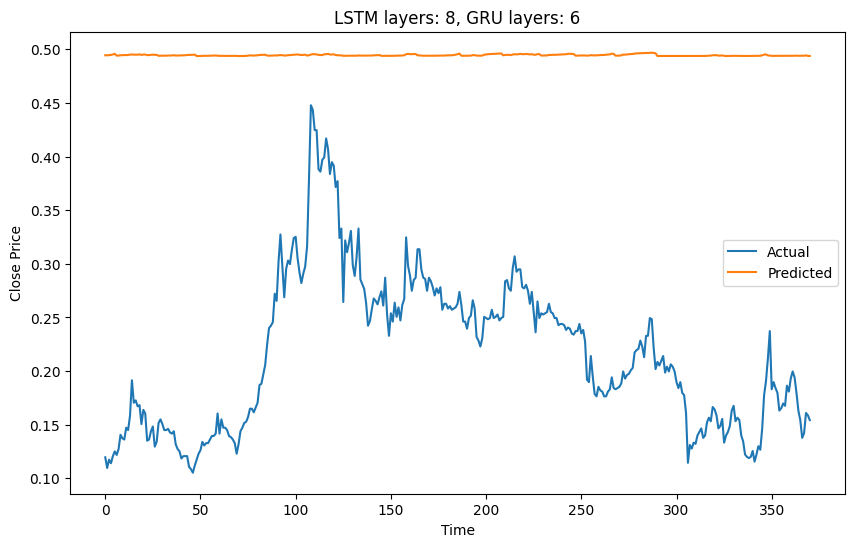

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step


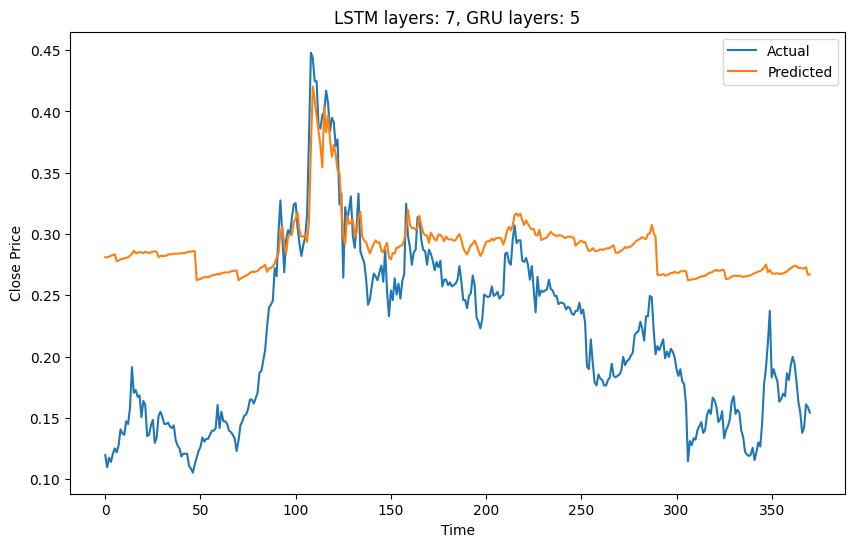

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step


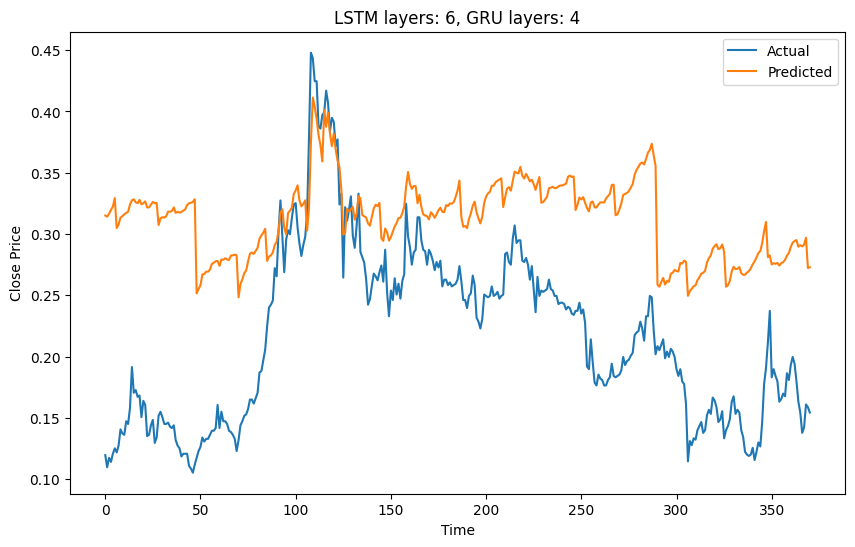

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step


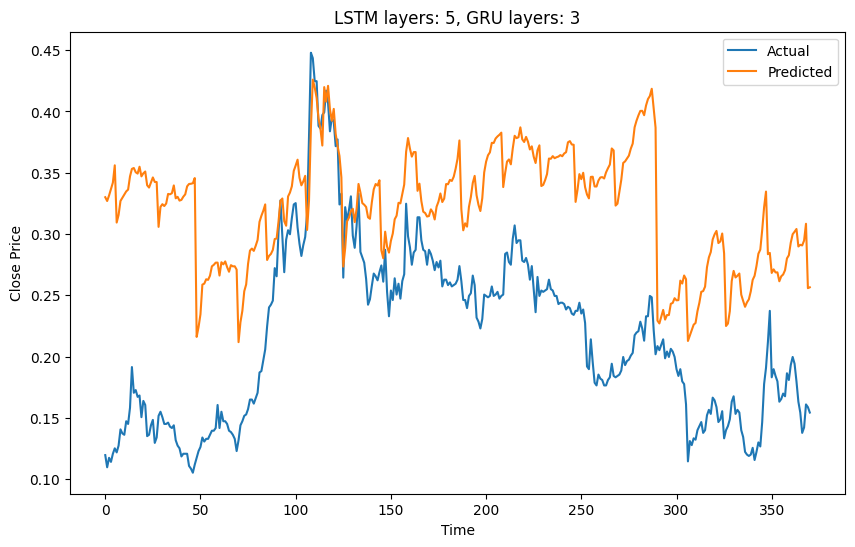

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step


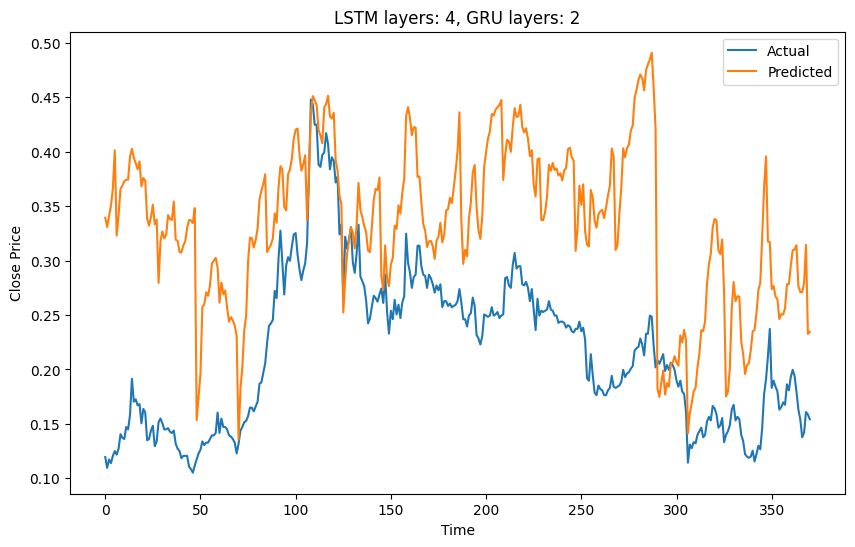

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


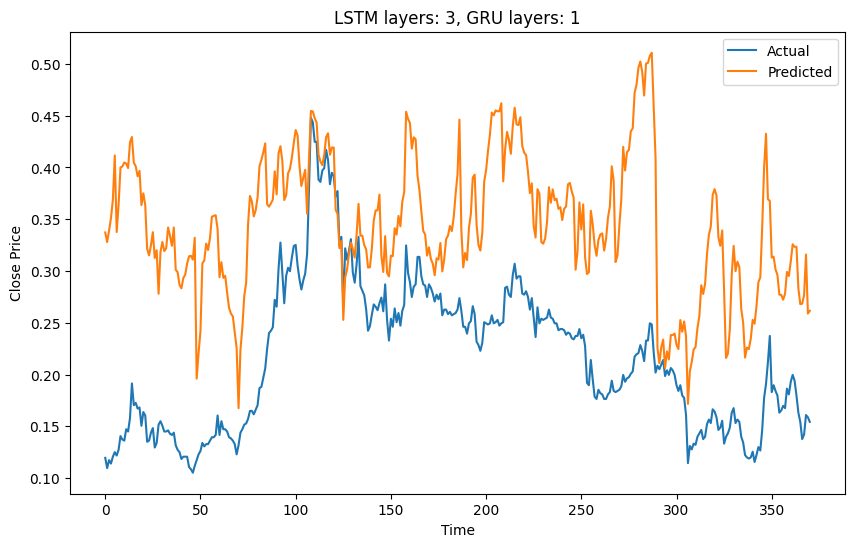

12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 339ms/step


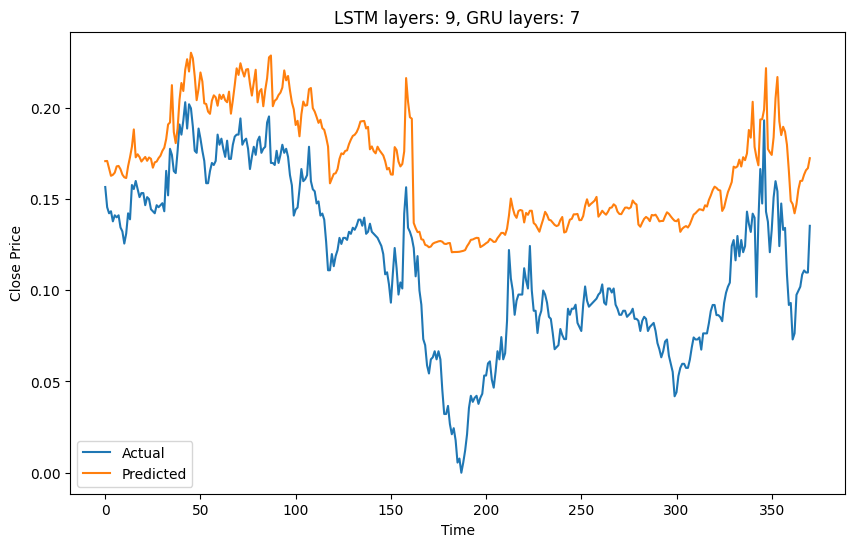

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step


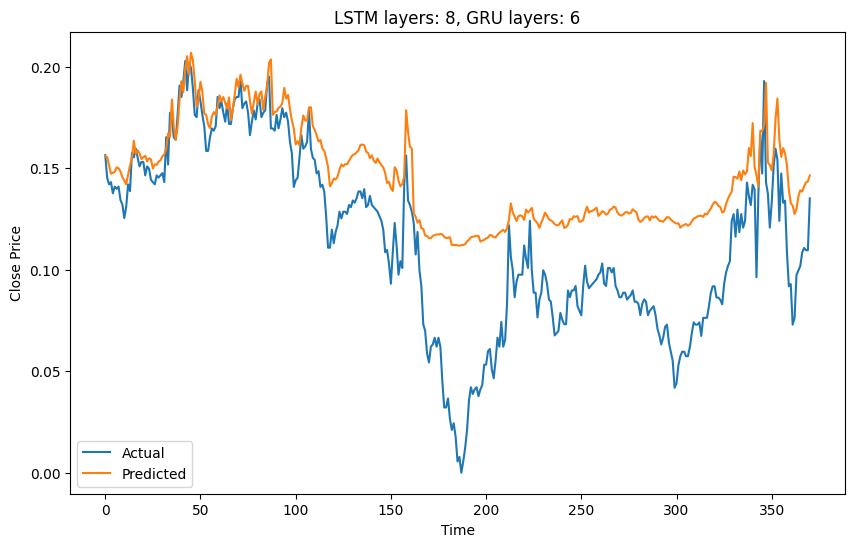

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step


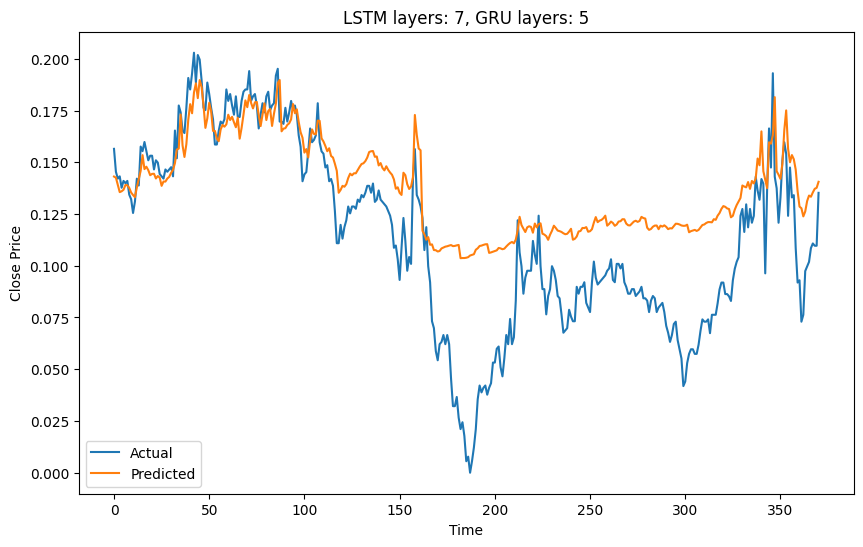

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step


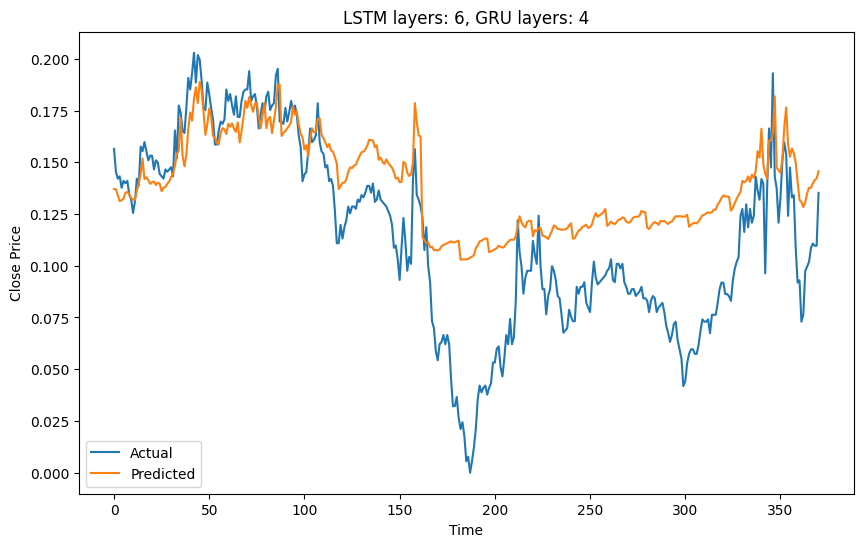

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step


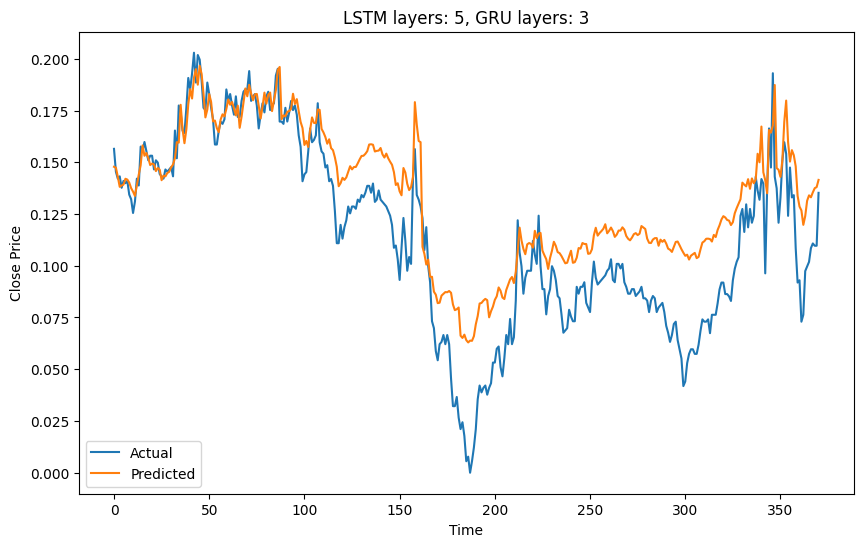

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step


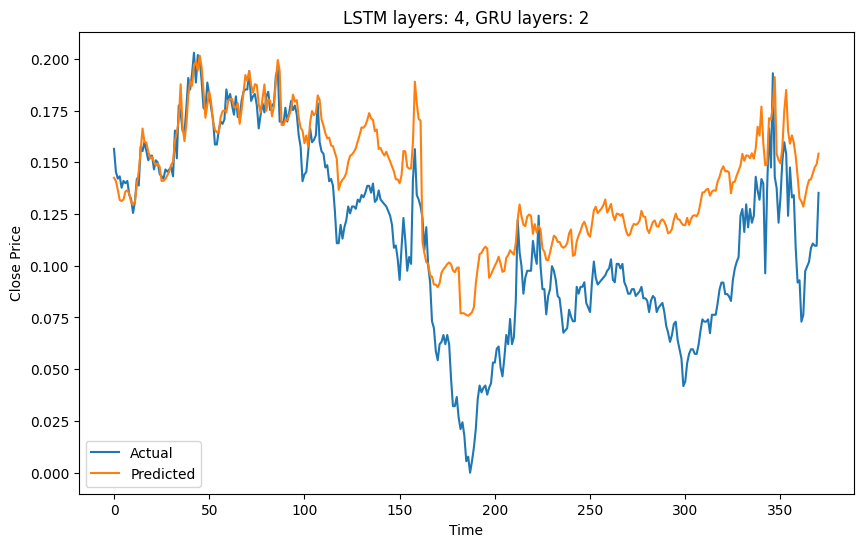

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


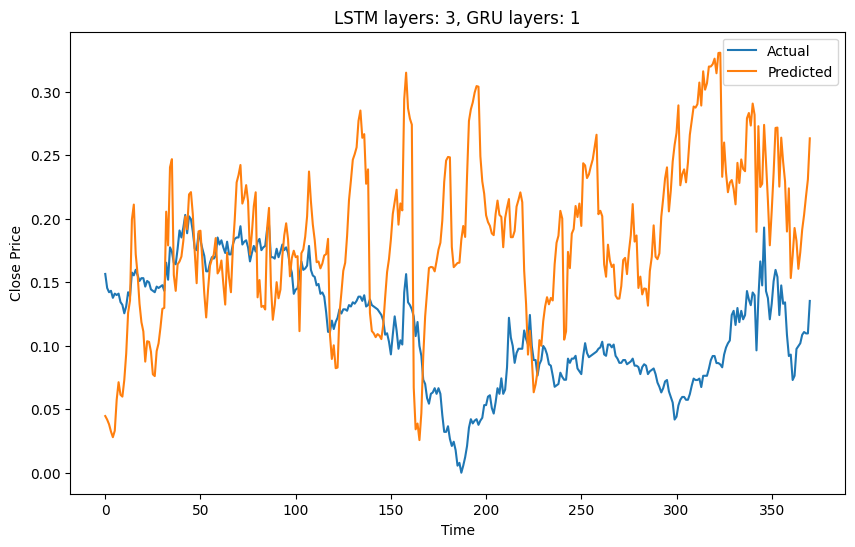

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step


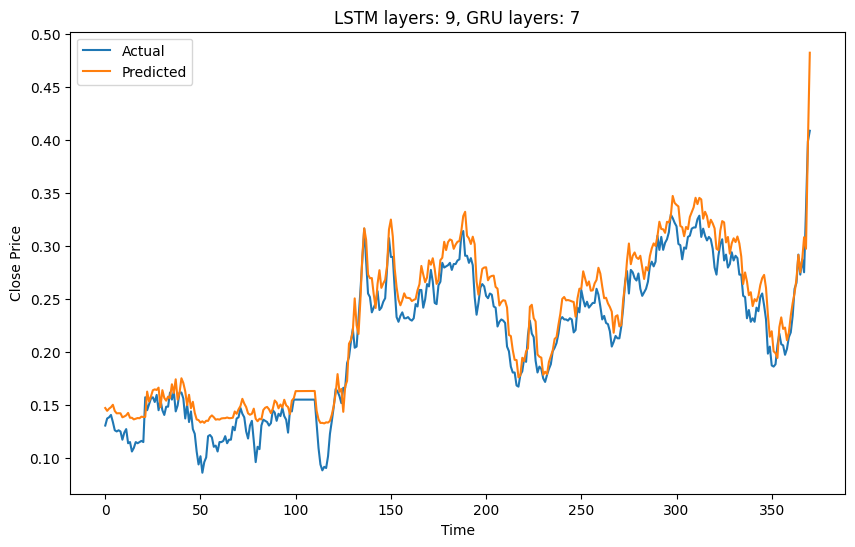

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step


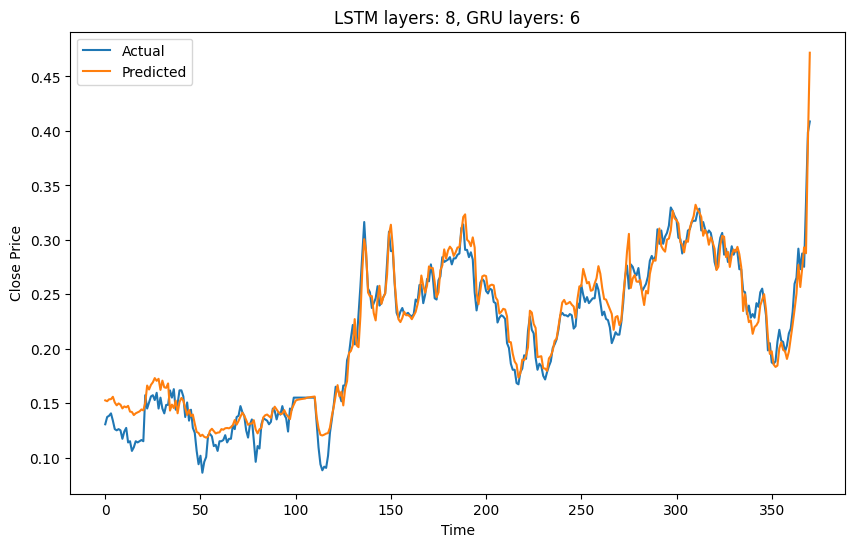

12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step


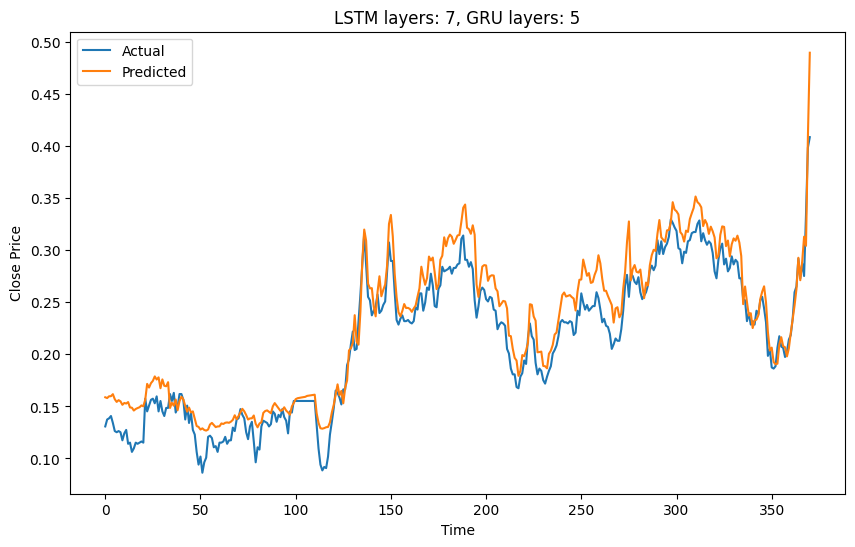

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step


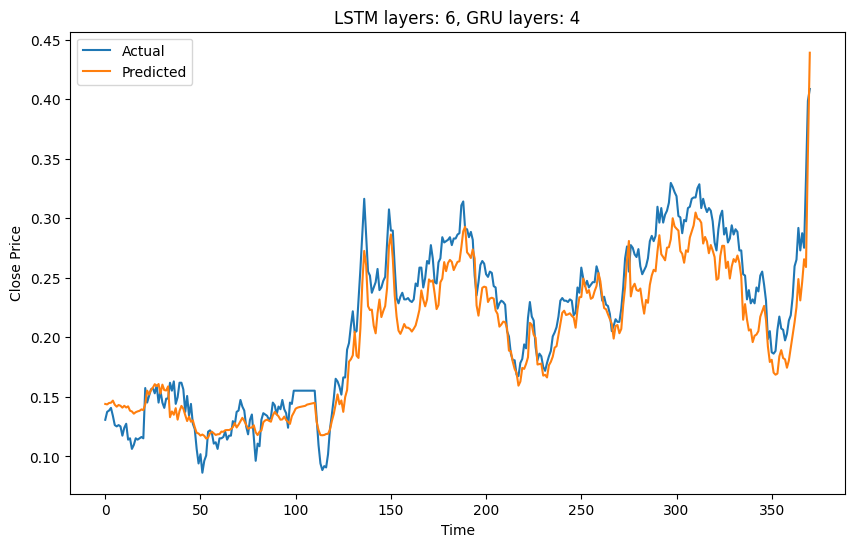

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step


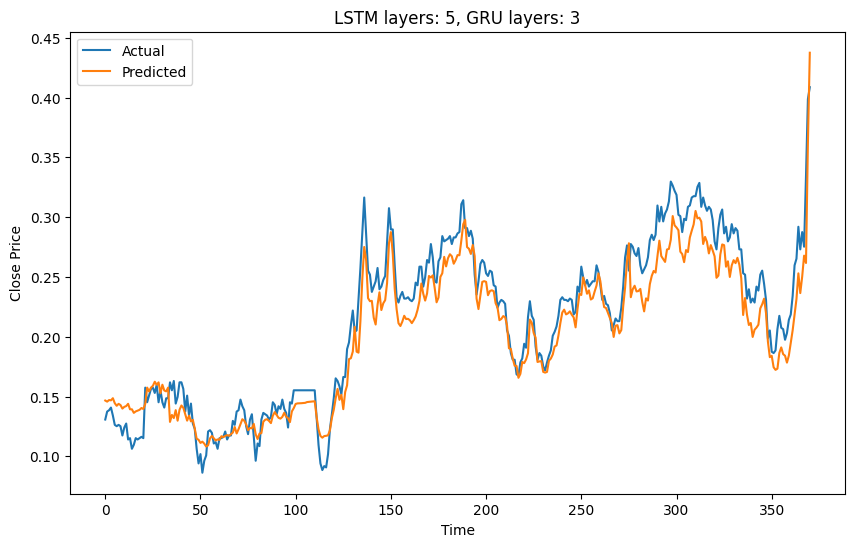

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step


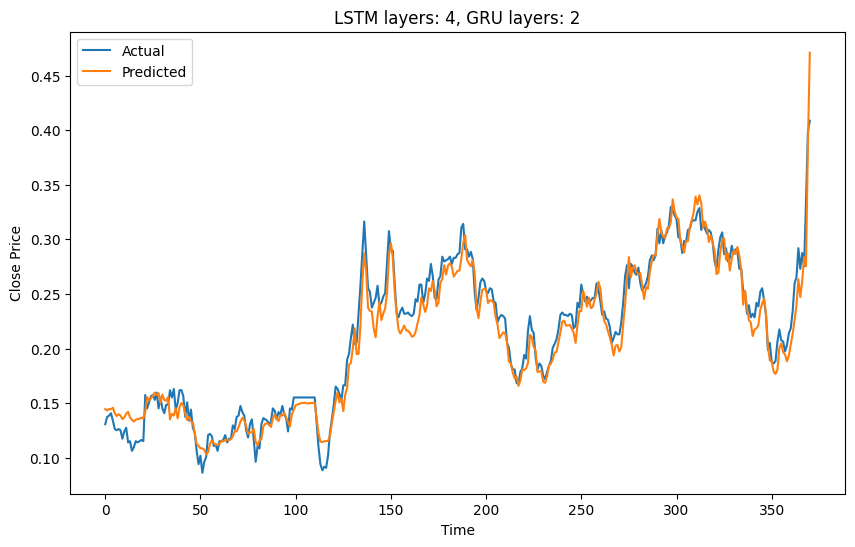

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


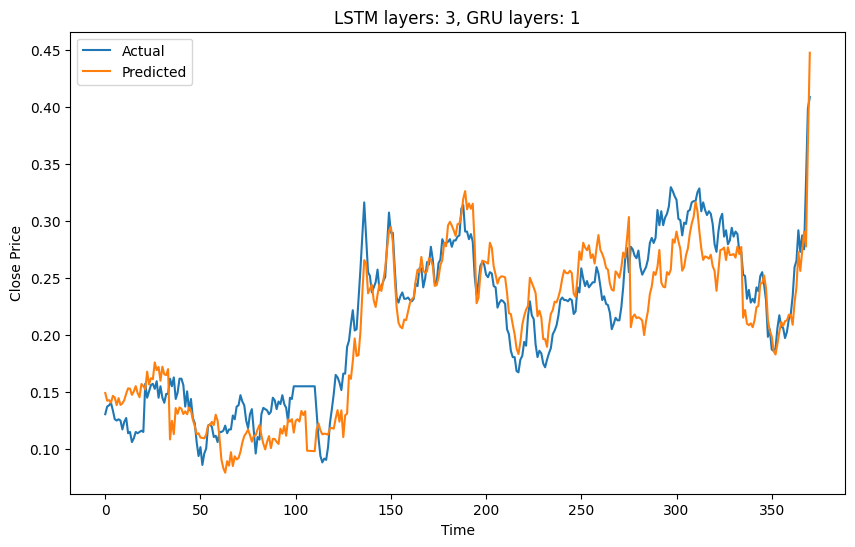

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step


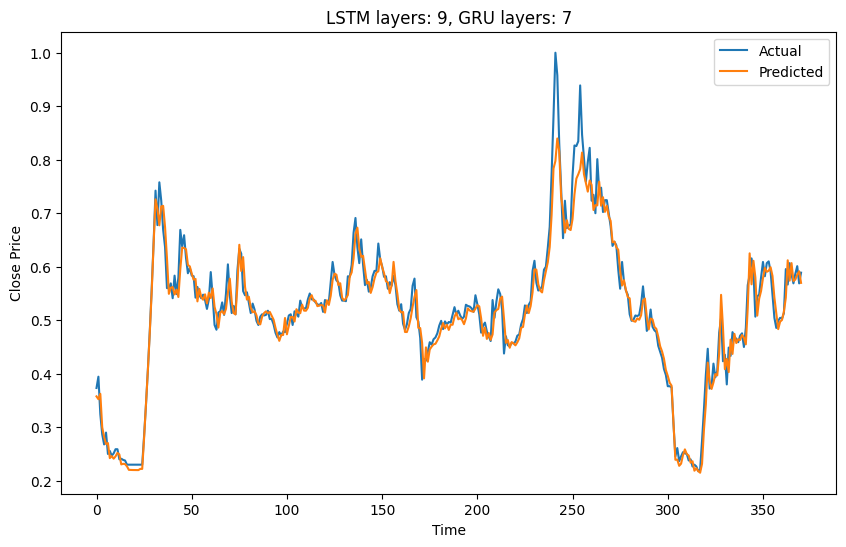

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step


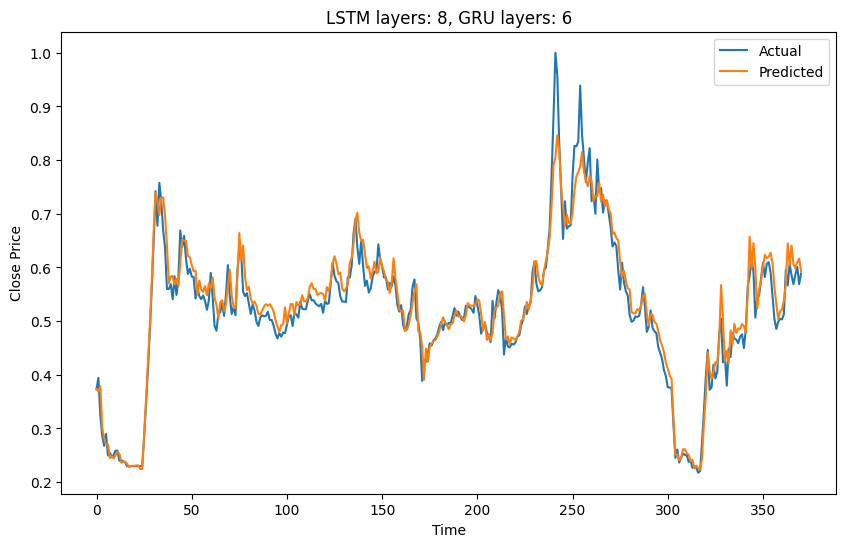

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step


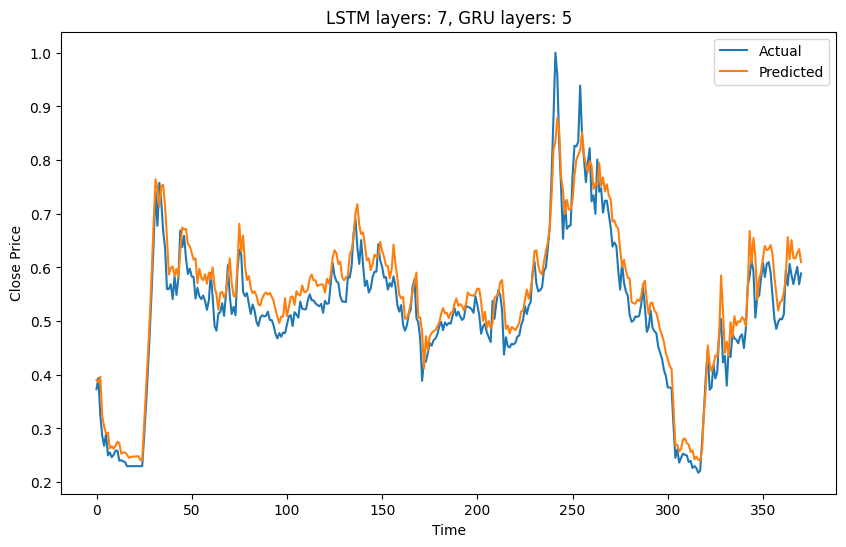

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step


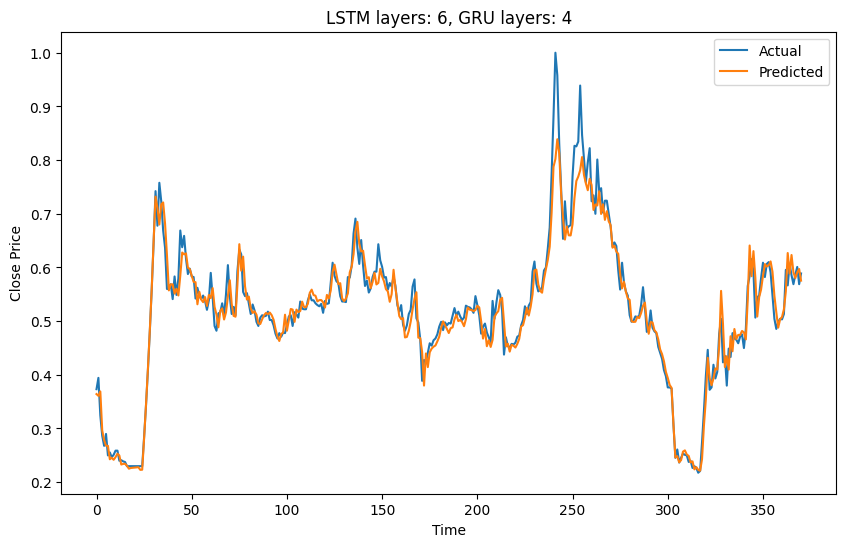

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step


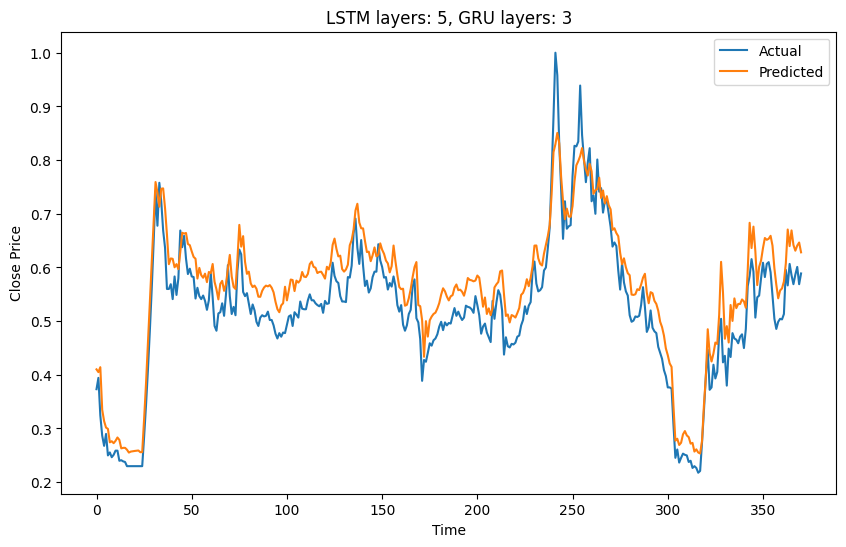

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step


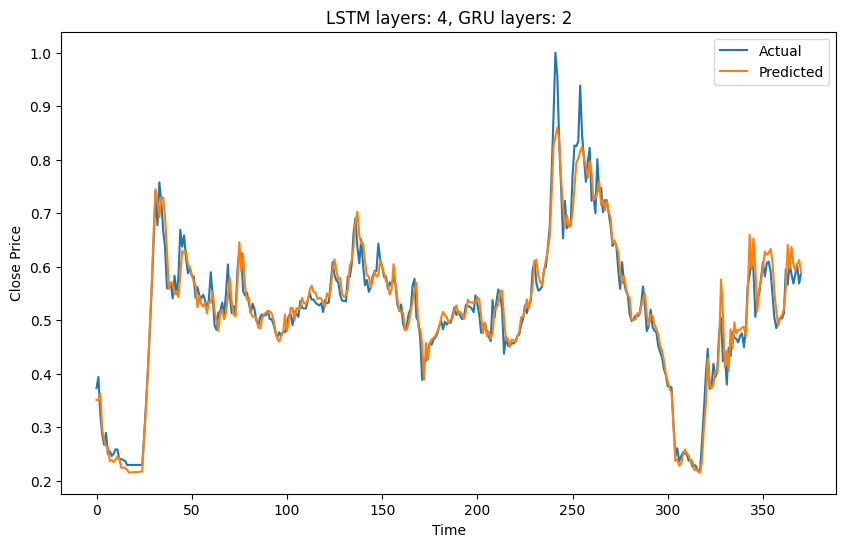

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


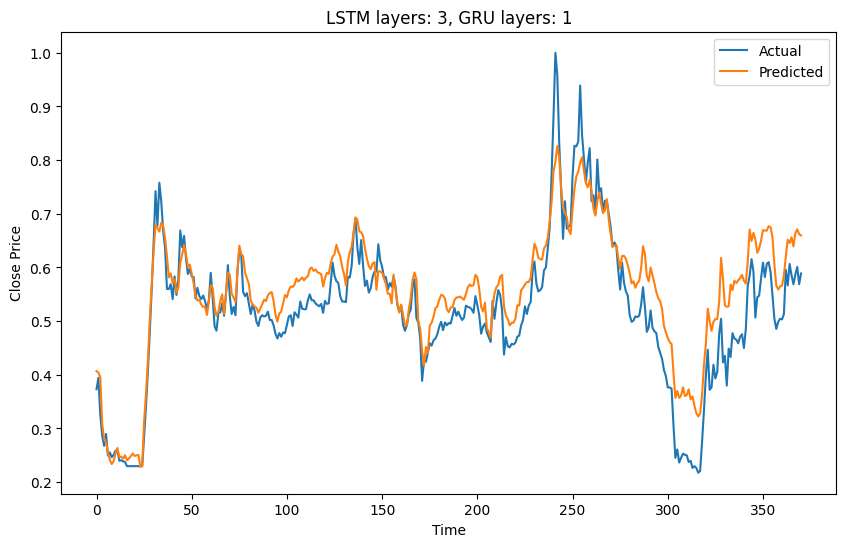

In [70]:
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # validation set
    val_split = int(len(X_train) * 0.8)
    X_train, X_val = X_train[:val_split], X_train[val_split:]
    y_train, y_val = y_train[:val_split], y_train[val_split:]

    # Reshape input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Model configurations for LSTM and GRU layer combinations
    configurations = [
        (9, 7), (8, 6), (7, 5), (6, 4), (5, 3), (4, 2), (3, 1)
    ]

    for lstm_layers, gru_layers in configurations:
        model = GRU_LSTM_Model(lstm_layers=lstm_layers, gru_layers=gru_layers, input_shape=(X_train.shape[1], 1))
        history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=0)

        # Model evaluation
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        results.append((lstm_layers, gru_layers, mse, rmse, mae, mape))

        # Plot for actual vs predicted values
        plt.figure(figsize=(10, 6))
        plt.plot(y_test, label="Actual")
        plt.plot(y_pred, label="Predicted")
        plt.title(f"LSTM layers: {lstm_layers}, GRU layers: {gru_layers}")
        plt.xlabel("Time")
        plt.ylabel("Close Price")
        plt.legend()
        plt.show()

## Model results

In [71]:
results_ = pd.DataFrame(results, columns=["LSTM Layers", "GRU Layers", "MSE", "RMSE", "MAE", "MAPE"])
results_

LSTM Layers  GRU Layers       MSE      RMSE       MAE          MAPE
0             9           7  0.039261  0.198144  0.163062  7.321809e-01
1             8           6  0.038414  0.195995  0.161827  7.239654e-01
2             7           5  0.037318  0.193178  0.160054  7.133303e-01
3             6           4  0.005154  0.071791  0.059273  2.371157e-01
4             5           3  0.008747  0.093524  0.075453  3.220627e-01
5             4           2  0.016177  0.127190  0.104073  4.553029e-01
6             3           1  0.019437  0.139416  0.117599  5.053252e-01
7             9           7  0.095994  0.309829  0.301401  1.672231e+00
8             8           6  0.082763  0.287685  0.278647  1.554293e+00
9             7           5  0.008195  0.090526  0.076559  4.747669e-01
10            6           4  0.012474  0.111688  0.098498  5.873720e-01
11            5           3  0.014517  0.120487  0.106163  6.174864e-01
12            4           2  0.018194  0.134886  0.118313  6.559760e-01
13            3           1  0.020909  0.144601  0.128212  7.170115e-01
14            9           7  0.002971  0.054508  0.050608  1.472415e+12
15            8           6  0.001512  0.038888  0.031427  1.361675e+12
16            7           5  0.001151  0.033931  0.026371  1.273933e+12
17            6           4  0.001279  0.035762  0.028583  1.261917e+12
18            5           3  0.000651  0.025513  0.020808  7.749585e+11
19            4           2  0.001179  0.034331  0.027818  9.299031e+11
20            3           1  0.012020  0.109637  0.088459  2.227895e+12
21            9           7  0.000403  0.020066  0.017028  9.325611e-02
22            8           6  0.000202  0.014220  0.010933  6.230870e-02
23            7           5  0.000482  0.021963  0.018216  9.789559e-02
24            6           4  0.000485  0.022014  0.018578  8.910884e-02
25            5           3  0.000420  0.020505  0.017043  8.156848e-02
26            4           2  0.000198  0.014071  0.011067  5.692743e-02
27            3           1  0.000777  0.027869  0.023407  1.219022e-01
28            9           7  0.000861  0.029339  0.019767  3.694000e-02
29            8           6  0.001010  0.031781  0.022499  4.211144e-02
30            7           5  0.001685  0.041054  0.034083  6.799245e-02
31            6           4  0.000891  0.029854  0.019843  3.625892e-02
32            5           3  0.002840  0.053293  0.047725  9.770613e-02
33            4           2  0.000815  0.028544  0.019782  3.820638e-02
34            3           1  0.003442  0.058668  0.046802  1.024975e-01

## Best model based on RMSE and MSE

In [72]:
best_model = results_.loc[results_['RMSE'].idxmin()]
print("Best Model Configuration based on RMSE:")
best_model

Best Model Configuration based on RMSE:


LSTM Layers    4.000000
GRU Layers     2.000000
MSE            0.000198
RMSE           0.014071
MAE            0.011067
MAPE           0.056927
Name: 26, dtype: float64